In [80]:
#@title install pips (hidden).
!pip install diffdist wldhx.yadisk-direct

In [81]:
#@title download pre-trained models and imagenet-mini (hidden).
!curl -L $(yadisk-direct https://yadi.sk/d/Sg9uSLfLBMCt5g?w=1) -o pretrained_models.zip
!unzip pretrained_models.zip 

!curl -L $(yadisk-direct https://yadi.sk/d/fGSnPLKHbnFdbQ?w=1) -o imagenet-mini.zip
!unzip imagenet-mini.zip > zip.out

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 18.5M    0 18.5M    0     0  4912k      0 --:--:--  0:00:03 --:--:-- 11.0M^C
Archive:  pretrained_models.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of pretrained_models.zip or
        pretrained_models.zip.zip, and cannot find pretrained_models.zip.ZIP, period.


In [ ]:
!git clone https://github.com/AndrewAtanov/simclr-pytorch.git

In [ ]:
import sys
sys.path.append('./simclr-pytorch')

In [2]:
%env IMAGENET_PATH=./imagenet-mini/raw-data

env: IMAGENET_PATH=./imagenet-mini/raw-data


In [3]:
import torch
import models
from utils import utils
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams['figure.dpi']=300

# ImageNet Prediction

In [8]:
device = torch.device('cuda')

# load linear model chekpoint
ckpt = torch.load('./pretrained_models/resnet50_imagenet_bs2k_epochs600_linear.pth.tar', map_location=device)
# set path to the corresponding encoder checkpoint
ckpt['hparams'].encoder_ckpt = './pretrained_models/resnet50_imagenet_bs2k_epochs600.pth.tar'

model = models.ssl.SSLEval.load(ckpt, device=device)
model.encoder.eval()
model.eval()

IMAGENET_PATH = ./imagenet-mini/raw-data
IMAGENET_PATH = ./imagenet-mini/raw-data
** Using avgpool **
======> Encoder: output dim 2048 | 25.557M parameters


In [9]:
# set number of loader workers and batch_size
model.hparams.workers = 2
model.hparams.batch_size = 100

In [10]:
model.prepare_data()
trainloader, testloader = model.dataloaders()

Train size: 504
Test size: 100


In [11]:
id2id = {0: 260, 1:951}
torch.manual_seed(42)
x, y = next(iter(testloader))
y = torch.Tensor(list(map(lambda y_: id2id[y_], y.numpy())))
x, y = x.cuda(), y.cuda()

(-0.5, 2248.5, 2248.5, -0.5)

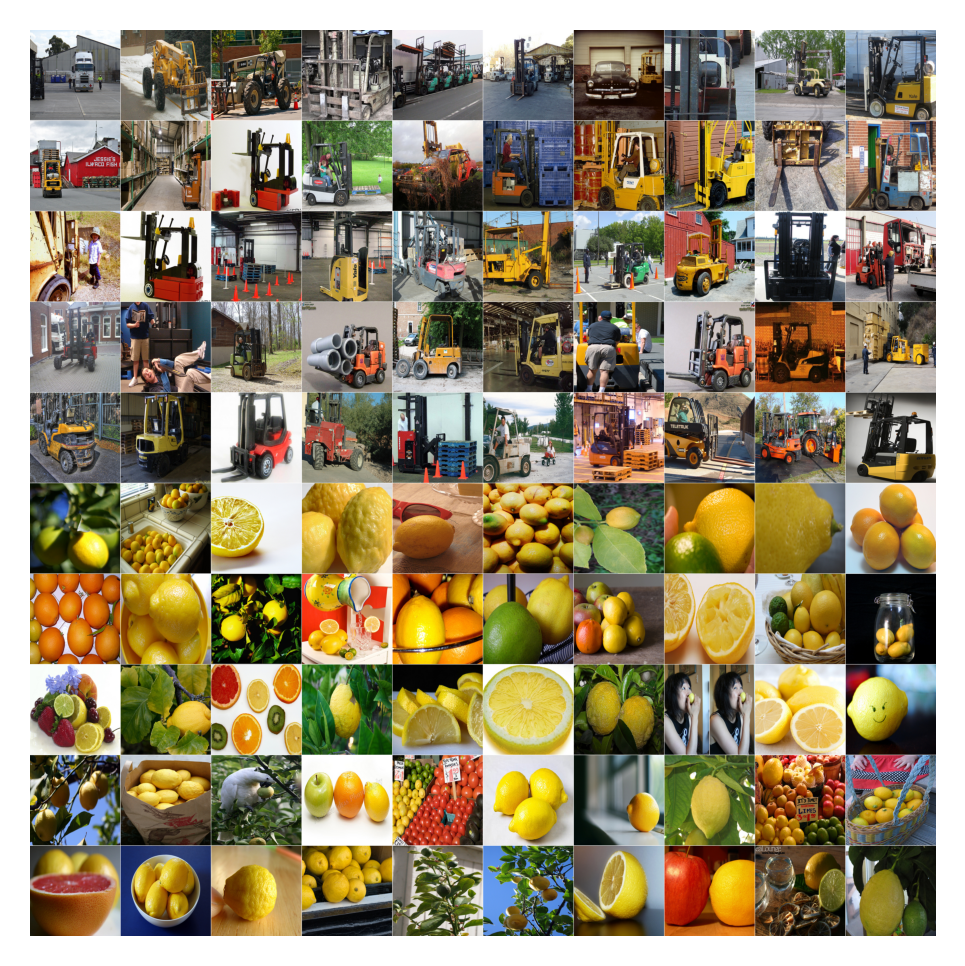

In [12]:
plt.imshow(utils.viz_array_grid(x[:100]/255., 10, 10, 1))
plt.axis('off')

In [13]:
# representations
h = model.encoder(x/255., out='h')
# linear predictions
p = model(h)
print(f'Accuracy: {(p.argmax(1) == y).float().mean():.3f}')

Accuracy: 0.270


In [15]:
p.argmax(1)
# 260 [n03384352 - forklift] are confused with 561 [n03532672 - hook, claw] 😪
# the lemons 319 [n07749582 - lemon] are mostly fine 😀 but somtemes got confused with 950 [n04597913 - wooden spoon]

tensor([867, 803, 866, 561, 561, 561, 468, 561, 561, 561, 425, 624, 561, 561,
        595, 561, 561, 561, 856, 561, 561, 561, 561, 561, 561, 517, 561, 561,
        561, 561, 561, 561, 561, 561, 561, 561, 561, 561, 561, 561, 561, 561,
        561, 561, 561, 561, 561, 561, 561, 561, 951, 948, 950, 951, 951, 951,
        951, 950, 951, 951, 950, 950, 950, 828, 951, 950, 951, 950, 951, 725,
        951, 951, 950, 951, 951, 950, 950, 629, 951, 951, 951, 951,  89, 950,
        950, 951, 950, 951, 951, 790, 950, 950, 950, 951, 951, 951, 950, 951,
        951, 951], device='cuda:0')